In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point
import xarray as xr
import numpy as np

In [2]:
y2016 = xr.open_dataset('/data/acker/WashU_V5_NA/V5NA04.02.HybridPM25.xNorthAmerica.2016001-2016364.nc')
y2017 = xr.open_dataset('/data/acker/WashU_V5_NA/V5NA04.02.HybridPM25.xNorthAmerica.2017001-2017364.nc')
y2018 = xr.open_dataset('/data/acker/WashU_V5_NA/V5NA04.02.HybridPM25.xNorthAmerica.2018001-2018364.nc')

In [3]:
stacked = xr.concat([y2016, y2017, y2018], dim="dataset")

# Take the mean across the "dataset" dimension
averaged_ds = stacked.mean(dim="dataset")

In [4]:
import geopandas as gpd
# Replace with the path to your US states shapefile
states_gdf = gpd.read_file('/data/acker/for_lizzy/cb_2023_us_state_20m.shp')

# Ensure the shapefile is in WGS 84 (latitude/longitude)
states_gdf = states_gdf.to_crs(epsg=4326)
# Removing rows where 'NAME' is 'Texas' or 'California'
states_gdf = states_gdf[~states_gdf['NAME'].isin(['Puerto Rico'])]
states_gdf.NAME.unique()

array(['Texas', 'California', 'Kentucky', 'Georgia', 'Wisconsin',
       'Oregon', 'Missouri', 'Virginia', 'Tennessee', 'Louisiana',
       'New York', 'Idaho', 'Florida', 'Illinois', 'Montana', 'Minnesota',
       'Maryland', 'Iowa', 'District of Columbia', 'Washington',
       'South Dakota', 'Ohio', 'Nebraska', 'Indiana', 'Massachusetts',
       'Nevada', 'North Dakota', 'Arkansas', 'Mississippi', 'Colorado',
       'North Carolina', 'Utah', 'Oklahoma', 'Wyoming', 'West Virginia',
       'South Carolina', 'Maine', 'Hawaii', 'Alabama', 'Kansas',
       'Rhode Island', 'Connecticut', 'Michigan', 'Alaska', 'Delaware',
       'New Mexico', 'Vermont', 'New Jersey', 'Pennsylvania',
       'New Hampshire', 'Arizona'], dtype=object)

In [5]:
lon2d, lat2d = np.meshgrid(averaged_ds.lon, averaged_ds.lat)

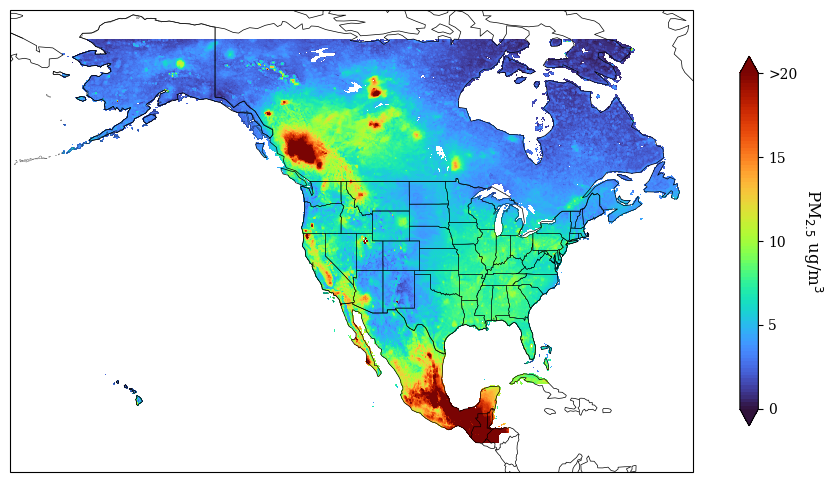

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors

# Load custom font
plt.rcParams["font.family"] = "serif"

# Assuming 'filtered_ds' is your xarray dataset
# lon2d, lat2d = np.meshgrid(filtered_ds.lon, filtered_ds.lat)  # Create 2D coordinates for plotting

# Load shapefile of state boundaries

# Set up the Cartopy map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for lat/lon data
ax.set_extent([-180, -50, 10, 72], crs=ccrs.PlateCarree())  # Adjust extent for the entire US

# Add map features
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor="black")
ax.add_feature(cfeature.STATES, linewidth=0.2, edgecolor="black")

# Plot the filled contours
colormap = 'turbo'
levels = np.linspace(0, 20, 100)
norm = colors.Normalize(vmin=0, vmax=20)
con = plt.contourf(lon2d, lat2d, averaged_ds.GWRPM25.values, levels=levels, cmap=colormap,
                   norm=norm, transform=ccrs.PlateCarree(), extend='both')

# Overlay state boundaries
states_gdf.boundary.plot(ax=ax, color='black', linewidth=0.2, transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(con, ax=ax, orientation='vertical', shrink=0.8, pad=0.05)
cbar.set_label(r'PM$_{2.5}$ ug/m$^3$', fontsize=12, rotation=270, labelpad=20)

# Set tick labels for the colorbar, indicating <=4 and >=14
bounfiltered_ds = np.array([0,5,10,15,20])
cbar.set_ticks(bounfiltered_ds)
cbar_labels = ['0'] + [f'{tick}' for tick in bounfiltered_ds[1:-1]] + ['>20']
cbar.set_ticklabels(cbar_labels)

# Remove the minor ticks
cbar.ax.yaxis.set_ticks([], minor=True)

# Title
#plt.title(r'Average 2020-2022 PM$_{2.5}$', fontsize=16)

# Save or show the plot
# plt.savefig('pm_avg_cartopy.png', dpi=600)
plt.show()


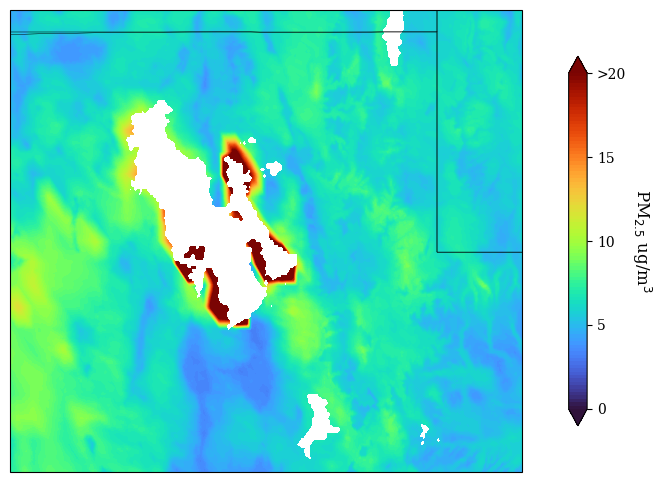

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors

# Load custom font
plt.rcParams["font.family"] = "serif"

# Assuming 'filtered_ds' is your xarray dataset
# lon2d, lat2d = np.meshgrid(filtered_ds.lon, filtered_ds.lat)  # Create 2D coordinates for plotting

# Load shapefile of state boundaries

# Set up the Cartopy map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for lat/lon data
ax.set_extent([-113.8, -110.5, 40, 42.1], crs=ccrs.PlateCarree())  # Adjust extent for the entire US
#-113.796387,40.360305,-110.852051,42.014638
# Add map features
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor="black")
ax.add_feature(cfeature.STATES, linewidth=0.2, edgecolor="black")

# Plot the filled contours
colormap = 'turbo'
levels = np.linspace(0, 20, 100)
norm = colors.Normalize(vmin=0, vmax=20)
con = plt.contourf(lon2d, lat2d, averaged_ds.GWRPM25.values, levels=levels, cmap=colormap,
                   norm=norm, transform=ccrs.PlateCarree(), extend='both')

# Overlay state boundaries
states_gdf.boundary.plot(ax=ax, color='black', linewidth=0.2, transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(con, ax=ax, orientation='vertical', shrink=0.8, pad=0.05)
cbar.set_label(r'PM$_{2.5}$ ug/m$^3$', fontsize=12, rotation=270, labelpad=20)

# Set tick labels for the colorbar, indicating <=4 and >=14
bounfiltered_ds = np.array([0,5,10,15,20])
cbar.set_ticks(bounfiltered_ds)
cbar_labels = ['0'] + [f'{tick}' for tick in bounfiltered_ds[1:-1]] + ['>20']
cbar.set_ticklabels(cbar_labels)

# Remove the minor ticks
cbar.ax.yaxis.set_ticks([], minor=True)

# Title
#plt.title(r'Average 2020-2022 PM$_{2.5}$', fontsize=16)

# Save or show the plot
# plt.savefig('pm_avg_cartopy.png', dpi=600)
plt.show()


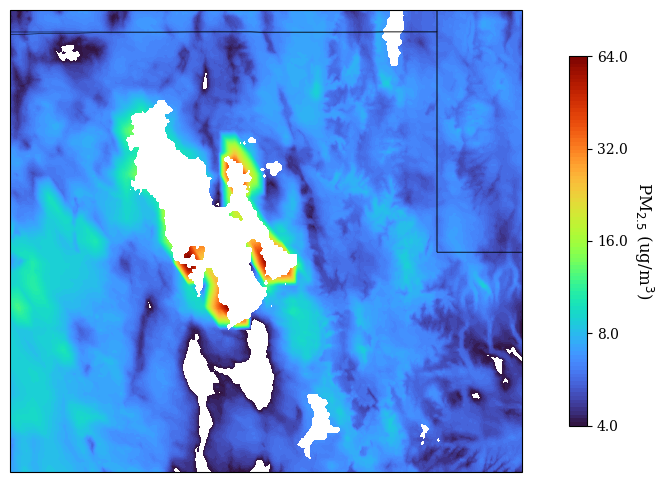

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import colors

# Load custom font
plt.rcParams["font.family"] = "serif"

# Assuming 'filtered_ds' is your xarray dataset
# lon2d, lat2d = np.meshgrid(filtered_ds.lon, filtered_ds.lat)  # Create 2D coordinates for plotting

# Set up the Cartopy map
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())  # Use PlateCarree for lat/lon data
ax.set_extent([-113.8, -110.5, 40, 42.1], crs=ccrs.PlateCarree())  # Adjust extent for the specified region

# Add map features
ax.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5, edgecolor="black")
ax.add_feature(cfeature.STATES, linewidth=0.2, edgecolor="black")

# Plot the filled contours
colormap = 'turbo'
vmin, vmax = 4, 64  # Set minimum and maximum values for log scale
levels = np.logspace(np.log2(vmin), np.log2(vmax), num=100, base=2)  # Levels in log base 2 scale
norm = colors.LogNorm(vmin=vmin, vmax=vmax)  # Log normalization without 'base'

con = plt.contourf(lon2d, lat2d, averaged_ds.GWRPM25.values, levels=levels, cmap=colormap,
                   norm=norm, transform=ccrs.PlateCarree())

# Overlay state boundaries
states_gdf.boundary.plot(ax=ax, color='black', linewidth=0.2, transform=ccrs.PlateCarree())

# Add colorbar
cbar = plt.colorbar(con, ax=ax, orientation='vertical', shrink=0.8, pad=0.05)
cbar.set_label(r'PM$_{2.5}$ (ug/m$^3$)', fontsize=12, rotation=270, labelpad=20)

# Set tick labels for the colorbar in log base 2
cbar_ticks = [4, 8, 16, 32, 64]
cbar.set_ticks(cbar_ticks)
cbar_labels = [f'{tick:.1f}' for tick in cbar_ticks]
cbar.set_ticklabels(cbar_labels)

# Title
#plt.title(r'Average 2020-2022 PM$_{2.5}$', fontsize=16)

# Save or show the plot
# plt.savefig('pm_avg_cartopy.png', dpi=600)
plt.show()


In [9]:
print(y2016['GWRPM25'].max())
print(y2016['GWRPM25'].quantile(0.95))

<xarray.DataArray 'GWRPM25' ()> Size: 4B
array(63.3, dtype=float32)
<xarray.DataArray 'GWRPM25' ()> Size: 8B
array(10.39999962)
Coordinates:
    quantile  float64 8B 0.95
